Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>

## JointGrid

## Table of Contents

### State machine and Object oriented interfaces
   - #### Create a plot using state machine interface
   - #### Create a plot using object oriented interface

### Jointplot() function
   - #### Create a plot using jointplot() function
   - #### Overlay plots on a jointplot

### JointGrid() function    
   - #### Create a jointplot using plot() method
   - #### Create a jointplot using Matplotlib's object oriented approach
   - #### Axes level functions
   - #### Create a jointplot with color dimension

### State machine and Object oriented interfaces

The Matplotlib library provides two interfaces for plotting:

1. State machine interface
2. Object-oriented interface

The state machine interface is implemented using the pyplot sub-module in Matplotlib. Pyplot is a collection of several commands and functions. When the user runs a plotting function defined in pyplot, the state-machine interface implicitly creates the figure and axes objects and then renders the plot. The state machine interface keeps track of the current figure and plotting area. The plotting functions draw on the currently active figure and change the status of the figure. The pyplot sub-module is good for instantly visualizing and interpreting our data. 

The object-oriented interface provides more flexibility and control over the figure and axes objects by explicitly creating these objects. Each element of the plot is created separately using a series of function calls making it possible to modify specific elements of a plot. This gives us more control over all of the plot elements. In the object-oriented approach, the user needs to explicitly create and keep track of the figure and axes objects. Few of the functions defined in pyplot are used at this level such as figure(), subplot() in order to create figure and axes objects after that the user can modify and plot on these objects directly.            
Let us compare the state-machine interface with the object-oriented interface using some examples.

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

#### Create a plot using state machine interface

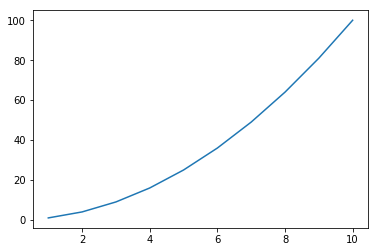

In [4]:
## State machine approach
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,4,9,16,25,36,49,64,81,100]
plt.plot(x,y)
plt.show()

The above plot is generated using the state machine interface. Notice that the plot() function is called by passing two arrays. The function then implicitly creates a figure object, creates a plotting area in a figure, places the xticks and yticks on the respective axis and draws a line graph by joining the data points. The status of the figure object is changed by the plot() function to the current state from an empty figure. 

#### Create a plot using object oriented interface

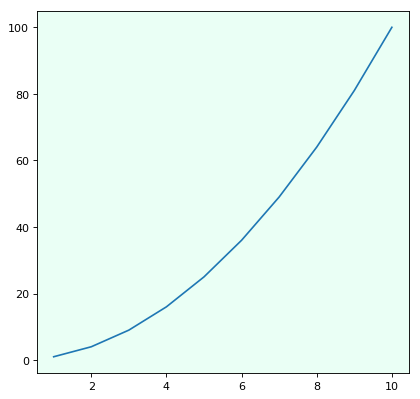

In [46]:
## Object-oriented approach
fig = plt.figure(figsize=(6,6),dpi=80,edgecolor='b', frameon=True)
axes1 = plt.subplot(facecolor='#eafff5',alpha=0.5)
axes1.plot(x,y)
plt.show()

The above plot is generated using the object oriented style. The figure object is created first by calling the figure() function in pyplot and then an axes object is created by calling the subplot() function. In order to render the plot, the plot() function is called on the axes instance (axes1) and it draws a line graph. Notice that we have modified the properties of the figure and axes objects independent of each other.

### Jointplot() function

The jointplot() function is a figure-level function, it implicitly and automatically creates a JointGrid object consisting of three axes objects and then draws a plot depending on the value assigned to 'kind' argument such as 'scatter', 'kde', 'hist' etc., 

#### Create a plot using jointplot() function

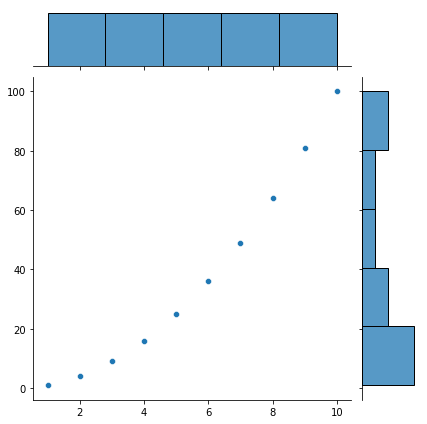

In [5]:
sns.jointplot(x=x,y=y,kind='scatter')
plt.show()

#### Overlay plots on a jointplot

The jointplot() function returns a JointGrid object (seaborn.axisgrid.JointGrid), using this object we can overlay different plots on an existing jointplot by calling the methods plot_joint() and plot_marginals(). The plot_joint() function accepts a Seaborn plotting function as the first argument and draws a bivariate plot on the joint axes of the grid. The plot_marginals() function accepts a Seaborn plotting function as the first argument and draws univariate plots on both the marginal axes.

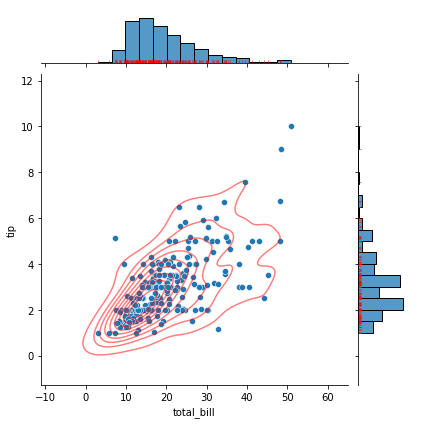

In [17]:
tips = sns.load_dataset('tips')
g1 = sns.jointplot(x='total_bill',y='tip',data=tips)                             ##create a jointplot
g1.plot_joint(sns.kdeplot,color='r',alpha=0.5)                                   ##overlay density plot on joint axes
g1.plot_marginals(sns.rugplot,color='r',height=0.06,alpha=0.5)                   ##overlay rugplot on marginal axes
plt.show()

You can see in the plot above that the jointplot() function has plotted a scatterplot and two marginal histograms. A bivariate density plot is overlaid on the scatterplot using the plot_joint() function. A rugplot is overlaid on the marginal histograms using the plot_marginals() function.  You can pass different keyword arguments corresponding to each plotting function as seen in the function call.

The jointplot() function is a light-weight wrapper for the JointGrid class. If you need more flexibility, you should use JointGrid directly.

### JointGrid() function

The JointGrid() function is a figure-level function, when the function is called a JointGrid() object is instantiated. The function creates a JointGrid object consisting of three axes objects but does not plot anything on it. In order to render plots you can call the plot() method. The plot() method is a basic method of the JointGrid class which accepts two plotting functions to draw the bivariate and univariate plots(one function for the joint axes and one for both marginal axes). Any additional keyword arguments passed to the plot() method are passed to both plotting functions.

class seaborn.JointGrid(*, x=None, y=None, data=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, size=None, marginal_ticks=False, hue=None, palette=None, hue_order=None, hue_norm=None)

#### Create a jointplot using plot() method

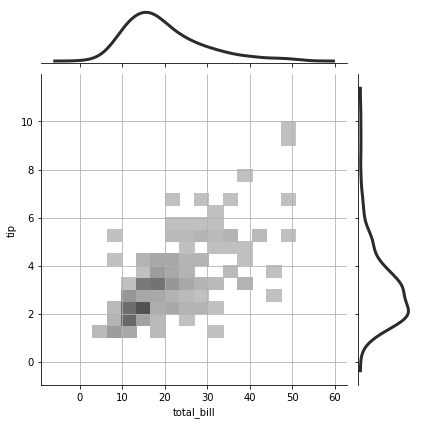

In [52]:
g2 = sns.JointGrid(x=tips['total_bill'],y=tips['tip'])                          
g2.plot(sns.histplot,sns.kdeplot,linewidth=3,color='#2B2B2B')
plt.show()

A 2d histogram is plotted on the joint axes and kdeplot on both the marginal axes. If you want to pass different keyword arguments to each function, then you can call the methods plot_joint() and plot_marginals() on the JointGrid object. 

#### Create a jointplot using Matplotlib's object oriented approach

In order to plot onto a specific axes we can access the JointGrid attributes ax_joint, ax_marg_x, and ax_marg_y , which are the underlying matplotlib axes (matplotlib.axes._subplots.AxesSubplot). We can call methods for plotting directly from the axes object, which gives us more flexibility in customizing our plot.

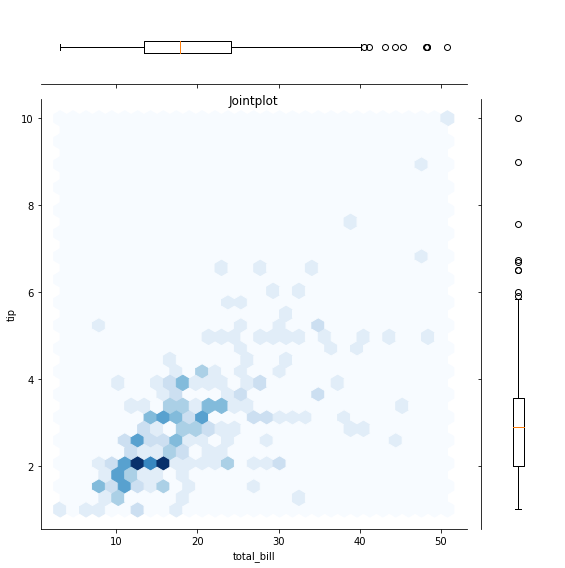

In [61]:
g3 = sns.JointGrid(x='total_bill',y='tip',data=tips,height=8,ratio=5)
g3.ax_joint.hexbin(x=tips['total_bill'],y=tips['tip'],cmap='Blues',gridsize=30)
g3.ax_marg_x.boxplot(x=tips['total_bill'],vert=False)
g3.ax_marg_y.boxplot(x=tips['tip'])
g3.ax_joint.set_title('Jointplot',pad=-5)
plt.show()

#### Axes level functions

The plotting functions such as scatterplot, kdeplot, histplot are called axes-level functions as they directly plot onto the specified axes without affecting the rest of the figure. The axes-level functions include an argument 'ax' which specifies the axes to be used for plotting. The figure-level functions setup the grid and the axes objects and then the axes-level functions are called for plotting.

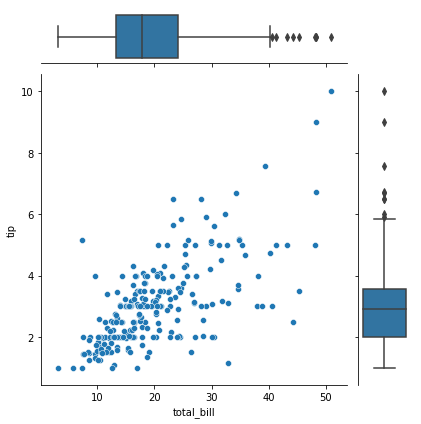

In [54]:
g4 = sns.JointGrid(x=tips['total_bill'],y=tips['tip'])
sns.boxplot(x=tips['total_bill'],ax=g4.ax_marg_x)
sns.boxplot(y=tips['tip'],ax=g4.ax_marg_y)
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],ax=g4.ax_joint)
plt.show()

#### Create a jointplot with color dimension

We can add a third dimension to the bivariate graph using the 'hue' argument. The plot gets split based on 'hue' by producing data points with different colors. The 'hue' argument can be passed to the JointGrid() function. Note that the axes-level functions must support 'hue' in order to use it in JointGrid.

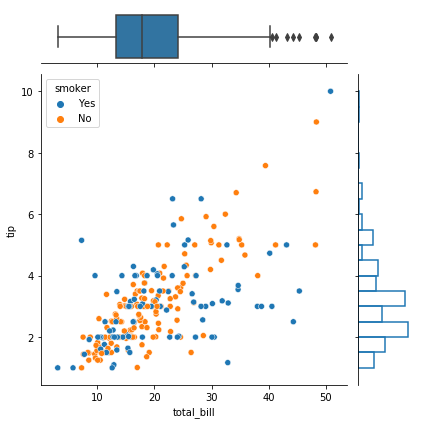

In [62]:
g5 = sns.JointGrid(x=tips['total_bill'],y=tips['tip'],hue=tips['smoker'])
sns.boxplot(x=tips['total_bill'],ax=g5.ax_marg_x)
sns.histplot(y=tips['tip'],fill=False,ax=g5.ax_marg_y)
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['smoker'],ax=g5.ax_joint)
plt.show()